# Extended corner plot of GW170817

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import bilby
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.lines as mlines
import corner

In [1]:
result1.keys()

NameError: name 'result1' is not defined

In [3]:
# TaylorF2Ecck
result1 = bilby.result.read_in_result("result_files/ecck.hdf5")

chirp_mass1 = result1.posterior["chirp_mass"].values
mass_ratio1 =  result1.posterior["mass_ratio"].values
e01 = result1.posterior["eccentricity"].values
theta_jn1 = result1.posterior["theta_jn"].values
D1 = result1.posterior["luminosity_distance"].values
ra1 = result1.posterior["ra"].values
dec1 = result1.posterior["dec"].values

m11 = (chirp_mass1*(1+mass_ratio1)**(1/5))/mass_ratio1**(3/5)
m21 = chirp_mass1*mass_ratio1**(2/5)*(1+mass_ratio1)**(1/5)
mtot1 = m11 + m21
# symmetric mass ratio
eta1 = (m11*m21)/(mtot1**2)
print(result1.log_10_bayes_factor)
# 90% credible interval
print(result1.posterior["eccentricity"].median(), result1.posterior["eccentricity"].quantile(0.05), result1.posterior["eccentricity"].quantile(0.95))

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'result_files/ecck.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
result2 = bilby.result.read_in_result("ecc3PNnospin.hdf5")

chirp_mass2 = result2.posterior["chirp_mass"].values
mass_ratio2 =  result2.posterior["mass_ratio"].values
e02 = result2.posterior["eccentricity"].values
theta_jn2 = result2.posterior["theta_jn"].values
D2 = result2.posterior["luminosity_distance"].values
ra2 = result2.posterior["ra"].values
dec2 = result2.posterior["dec"].values

m12 = (chirp_mass2*(1+mass_ratio2)**(1/5))/mass_ratio2**(3/5)
m22 = chirp_mass2*mass_ratio2**(2/5)*(1+mass_ratio2)**(1/5)
mtot2 = m12 + m22
# symmetric mass ratio
eta2 = (m12*m22)/(mtot2**2)
print(result2.log_10_bayes_factor)
# 90% credible interval
print(result2.posterior["eccentricity"].median(), result2.posterior["eccentricity"].quantile(0.05), result2.posterior["eccentricity"].quantile(0.95))

In [5]:
rng = np.random.default_rng(12345)

data1 = np.transpose(np.array([chirp_mass1, mass_ratio1, mtot1, eta1, e01, D1, theta_jn1]))
df1 = pd.DataFrame(data1, columns=["chirp_mass", "mass_ratio", 'mtot', 'eta', "eccentricity", "luminosity_distance", "theta_jn"])
df1 = df1.sample(n=nsamples, random_state=rng)

data2 = np.transpose(np.array([chirp_mass2, mass_ratio2, mtot2, eta2, e02, D2, theta_jn2]))
df2 = pd.DataFrame(data2, columns=["chirp_mass", "mass_ratio", 'mtot', 'eta', "eccentricity", "luminosity_distance", "theta_jn"])
df2 = df2.sample(n=nsamples, random_state=rng)

data3 = np.transpose(np.array([chirp_mass3, mass_ratio3, mtot3, eta3, e03, D3, theta_jn3]))
df3 = pd.DataFrame(data3, columns=["chirp_mass", "mass_ratio", 'mtot', 'eta', "eccentricity", "luminosity_distance", "theta_jn"])
df3 = df3.sample(n=nsamples, random_state=rng)

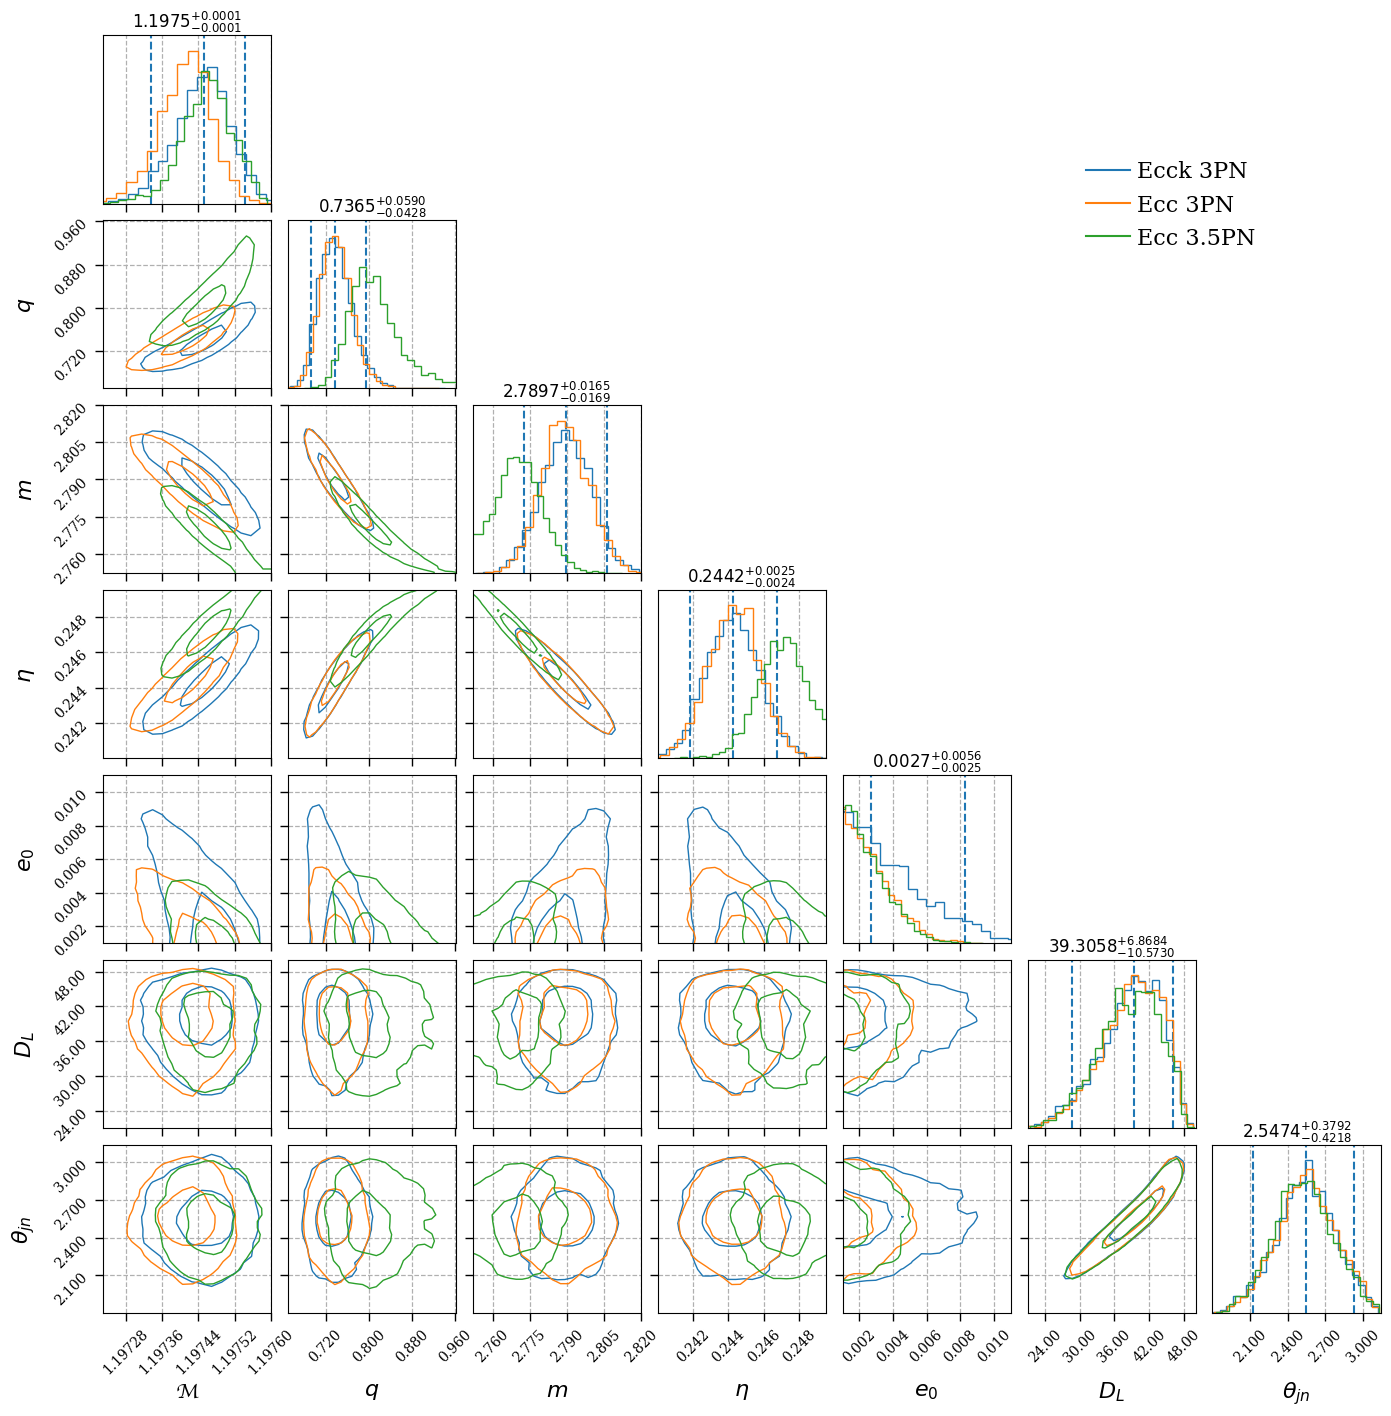

In [6]:
ndim = 7
fig, axes = plt.subplots(ndim, ndim, figsize=(14, 14), gridspec_kw={"hspace": 0.1, "wspace": 0.1})

# Generate corner plots with adjusted label padding
corner.corner(df1, fig=fig,color = 'C0', bins=25, smooth=0.8, plot_datapoints=False, plot_density=False, contourf_kwargs= dict(alpha=0.4), levels=(0.393,0.864), hist_kwargs={'linewidth': 1}, contour_kwargs={'linewidths': 1}, show_titles=True, quantiles=(0.05, 0.5, 0.95), title_fmt='.4f', title_kwargs={'fontsize': 12}, label_kwargs={'fontsize': 16})

corner.corner(df2, fig=fig, color='C1', bins=25, smooth=0.8, plot_datapoints=False, plot_density=False, contourf_kwargs= dict(alpha=0.4), levels=(0.393,0.864), hist_kwargs={'linewidth': 1}, contour_kwargs={'linewidths': 1},)

corner.corner(df3, fig=fig, color='C2', bins=25, smooth=0.8, plot_datapoints=False, plot_density=False, contourf_kwargs= dict(alpha=0.4), levels=(0.393,0.864), hist_kwargs={'linewidth': 1}, contour_kwargs={'linewidths': 1})

# x-axis tick labels
# Mc
axes[6, 0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '%.5f' % x))
axes[6,0].set_xlim(1.19723, 1.19760)
axes[5,0].set_xlim(1.19723, 1.19760)
axes[4,0].set_xlim(1.19723, 1.19760)
axes[3,0].set_xlim(1.19723, 1.19760)
axes[2,0].set_xlim(1.19723, 1.19760)
axes[1,0].set_xlim(1.19723, 1.19760)
axes[0,0].set_xlim(1.19723, 1.19760)
# q
axes[6, 1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '%.3f' % x))
axes[6,1].set_xlim(0.65, 0.962)
axes[5,1].set_xlim(0.65, 0.962)
axes[4,1].set_xlim(0.65, 0.962)
axes[3,1].set_xlim(0.65, 0.962)
axes[2,1].set_xlim(0.65, 0.962)
axes[1,1].set_xlim(0.65, 0.962)
# m
axes[6, 2].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '%.3f' % x))
axes[6,2].set_xlim(2.752, 2.820)
axes[5,2].set_xlim(2.752, 2.820)
axes[4,2].set_xlim(2.752, 2.820)
axes[3,2].set_xlim(2.752, 2.820)
axes[2,2].set_xlim(2.752, 2.820)
# eta
axes[6, 3].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '%.3f' % x))
axes[6,3].set_xlim(0.240, 0.2495)
axes[5,3].set_xlim(0.240, 0.2495)
axes[4,3].set_xlim(0.240, 0.2495)
axes[3,3].set_xlim(0.240, 0.2495)
axes[3,3].set_xlim(0.240, 0.2495)
# e0
axes[6, 4].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '%.3f' % x))
axes[6,4].set_xlim(0.001, 0.011)
axes[5,4].set_xlim(0.001, 0.011)
axes[4,4].set_xlim(0.001, 0.011)
axes[6, 5].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '%.2f' % x))
axes[6,5].set_xlim(21., 50.)
axes[5,5].set_xlim(21., 50.)
axes[6, 6].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '%.3f' % x))
axes[6,6].set_xlim(1.8, 3.14)

# y-axis tick labels
axes[6, 0].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '%.3f' % y))
axes[6,0].set_ylim(1.8, 3.14)
axes[6,1].set_ylim(1.8, 3.14)
axes[6,2].set_ylim(1.8, 3.14)
axes[6,3].set_ylim(1.8, 3.14)
axes[6,4].set_ylim(1.8, 3.14)
axes[6,5].set_ylim(1.8, 3.14)
axes[5, 0].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '%.2f' % y))
axes[5,0].set_ylim(21., 50.)
axes[5,1].set_ylim(21., 50.)
axes[5,2].set_ylim(21., 50.)
axes[5,3].set_ylim(21., 50.)
axes[5,4].set_ylim(21., 50.)
axes[4, 0].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '%.3f' % y))
axes[4,0].set_ylim(0.001, 0.011)
axes[4,1].set_ylim(0.001, 0.011)
axes[4,2].set_ylim(0.001, 0.011)
axes[4,3].set_ylim(0.001, 0.011)
axes[3, 0].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '%.3f' % y))
axes[3,0].set_ylim(0.240, 0.2495)
axes[3,1].set_ylim(0.240, 0.2495)
axes[3,2].set_ylim(0.240, 0.2495)
axes[2, 0].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '%.3f' % y))
axes[2,0].set_ylim(2.752, 2.820)
axes[2,1].set_ylim(2.752, 2.820)
axes[1, 0].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '%.3f' % y))
axes[1,0].set_ylim(0.65, 0.962)

# x-axis labels
size_axis_label = 16
axes[6,0].set_xlabel(r'$\mathcal{M}$', labelpad=2, fontsize=size_axis_label)
axes[6,1].set_xlabel(r'$q$', labelpad=11, fontsize=size_axis_label)
axes[6,2].set_xlabel(r'$m$', labelpad=11, fontsize=size_axis_label)
axes[6,3].set_xlabel(r'$\eta$', labelpad=11, fontsize=size_axis_label)
axes[6,4].set_xlabel(r'$e_0$', labelpad=11, fontsize=size_axis_label)
axes[6,5].set_xlabel(r'$D_L$', labelpad=11, fontsize=size_axis_label)
axes[6,6].set_xlabel(r'$\theta_{jn}$', labelpad=11, fontsize=size_axis_label)
# y-axis labels
axes[6, 0].set_ylabel(r'$\theta_{jn}$', labelpad=11, fontsize=size_axis_label)
axes[5, 0].set_ylabel(r'$D_L$', labelpad=11, fontsize=size_axis_label)
axes[4, 0].set_ylabel(r'$e_0$', labelpad=11, fontsize=size_axis_label)
axes[3, 0].set_ylabel(r'$\eta$', labelpad=11, fontsize=size_axis_label)
axes[2, 0].set_ylabel(r'$m$', labelpad=11, fontsize=size_axis_label)
axes[1, 0].set_ylabel(r'$q$', labelpad=11, fontsize=size_axis_label)

# grid lines
for ax in axes.flatten():
    ax.grid(True, linestyle='--', linewidth=0.9)

# add legend with line colors
blue_line = mlines.Line2D([], [], color='C0', label='Ecck 3PN')
orange_line = mlines.Line2D([], [], color='C1', label='Ecc 3PN')
green_line = mlines.Line2D([], [], color='C2', label='Ecc 3.5PN')
handles = [blue_line, orange_line, green_line]
labels = [h.get_label() for h in handles] 
fig.legend(handles=handles, labels=labels, bbox_to_anchor=(0., 0.9, 0.9, .0), ncol=1, fontsize=16)

plt.savefig("fullpe_gw170817.pdf", bbox_inches="tight", dpi=300)
plt.show()


In [7]:
# find credible intervals of ecck 3PN, use e01
e01_50 = np.quantile(e01, 0.5)
e01_5 = np.quantile(e01, 0.05)
e01_95 = np.quantile(e01, 0.95)
print(f"Ecck 3PN: 50%: {e01_50}, 5%: {e01_5}, 95%: {e01_95}")

Ecck 3PN: 50%: 0.0026899351402729513, 5%: 0.0002341674905728878, 95%: 0.008233495945316301


In [8]:
# Ecck logUniform
result4 = bilby.result.read_in_result("TF2Ecck_e0_logUniform.hdf5")
chirp_mass4 = result4.posterior["chirp_mass"].values
mass_ratio4 =  result4.posterior["mass_ratio"].values
e04 = result4.posterior["eccentricity"].values
D4 = result4.posterior["luminosity_distance"].values
theta_jn4 = result4.posterior["theta_jn"].values
m14 = (chirp_mass4*(1+mass_ratio4)**(1/5))/mass_ratio4**(3/5)
m24 = chirp_mass4*mass_ratio4**(2/5)*(1+mass_ratio4)**(1/5)
mtot4 = m14 + m24
eta4 = (m14*m24)/(mtot4**2)

# TF2Ecc logUniform
result5 = bilby.result.read_in_result("TaylorF2EccFD3PN_logUniform.hdf5")
chirp_mass5 = result5.posterior["chirp_mass"].values
mass_ratio5 =  result5.posterior["mass_ratio"].values
e05 = result5.posterior["eccentricity"].values
D5 = result5.posterior["luminosity_distance"].values
theta_jn5 = result5.posterior["theta_jn"].values
m15 = (chirp_mass5*(1+mass_ratio5)**(1/5))/mass_ratio5**(3/5)
m25 = chirp_mass5*mass_ratio5**(2/5)*(1+mass_ratio5)**(1/5)
mtot5 = m15 + m25
eta5 = (m15*m25)/(mtot5**2)

In [14]:
# Ecck 3PN
e01_50 = np.quantile(e01, 0.5)
e01_5 = np.quantile(e01, 0.05)
e01_95 = np.quantile(e01, 0.95)
print(f"\n Ecck 3PN: 50%: {e01_50}, 5%: {e01_5}, 95%: {e01_95}")
print(f"e0 = {e01_50} +{e01_95-e01_50} -{e01_50-e01_5}")
log10_bf = result1.log_10_bayes_factor
print(f"log10_bf = {log10_bf}")

# Ecc 3PN
e02_50 = np.quantile(e02, 0.5)
e02_5 = np.quantile(e02, 0.05)
e02_95 = np.quantile(e02, 0.95)
print(f"\n Ecc 3PN: 50%: {e02_50}, 5%: {e02_5}, 95%: {e02_95}")
print(f"e0 = {e02_50} +{e02_95-e02_50} -{e02_50-e02_5}")
log10_bf = result2.log_10_bayes_factor
print(f"log10_bf = {log10_bf}")

# Ecck logUniform
e04_50 = np.quantile(e04, 0.5)
e04_5 = np.quantile(e04, 0.05)
e04_95 = np.quantile(e04, 0.95)
print(f"\n Ecck logUniform: 50%: {e04_50}, 5%: {e04_5}, 95%: {e04_95}")
print(f"e0 = {e04_50} +{e04_95-e04_50} -{e04_50-e04_5}")
log10_bf = result4.log_10_bayes_factor
print(f"log10_bf = {log10_bf}")

# TF2Ecc logUniform
e05_50 = np.quantile(e05, 0.5)
e05_5 = np.quantile(e05, 0.05)
e05_95 = np.quantile(e05, 0.95)
print(f"\n TF2Ecc logUniform: 50%: {e05_50}, 5%: {e05_5}, 95%: {e05_95}")
print(f"e0 = {e05_50} +{e05_95-e05_50} -{e05_50-e05_5}")
log10_bf = result5.log_10_bayes_factor
print(f"log10_bf = {log10_bf}")


 Ecck 3PN: 50%: 0.0026899351402729513, 5%: 0.0002341674905728878, 95%: 0.008233495945316301
e0 = 0.0026899351402729513 +0.00554356080504335 -0.0024557676497000635
log10_bf = 368.41442976718145

 Ecc 3PN: 50%: 0.0017982359174972219, 5%: 0.00018095936703488983, 95%: 0.005087873685104498
e0 = 0.0017982359174972219 +0.003289637767607276 -0.0016172765504623321
log10_bf = 368.4299826409421

 Ecck logUniform: 50%: 0.002186473970079606, 5%: 0.0010744757966329012, 95%: 0.006355807837018114
e0 = 0.002186473970079606 +0.004169333866938508 -0.0011119981734467048
log10_bf = 369.2341710894667

 TF2Ecc logUniform: 50%: 0.0018740284357379512, 5%: 0.001064857824868573, 95%: 0.0044739120511334985
e0 = 0.0018740284357379512 +0.0025998836153955473 -0.0008091706108693782
log10_bf = 369.2643682975101


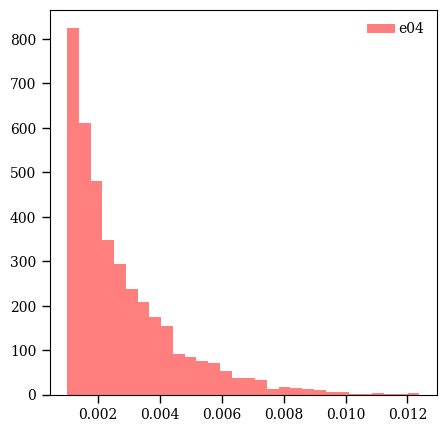

In [13]:
# plot e04
plt.hist(e04, bins=30, alpha=0.5, color='r', label='e04')
plt.legend(loc='upper right')
plt.show()


/var/folders/ws/0948zvwd7g795j2l3fryghjw0000gp/T/ipykernel_96649/3867978589.py:130: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


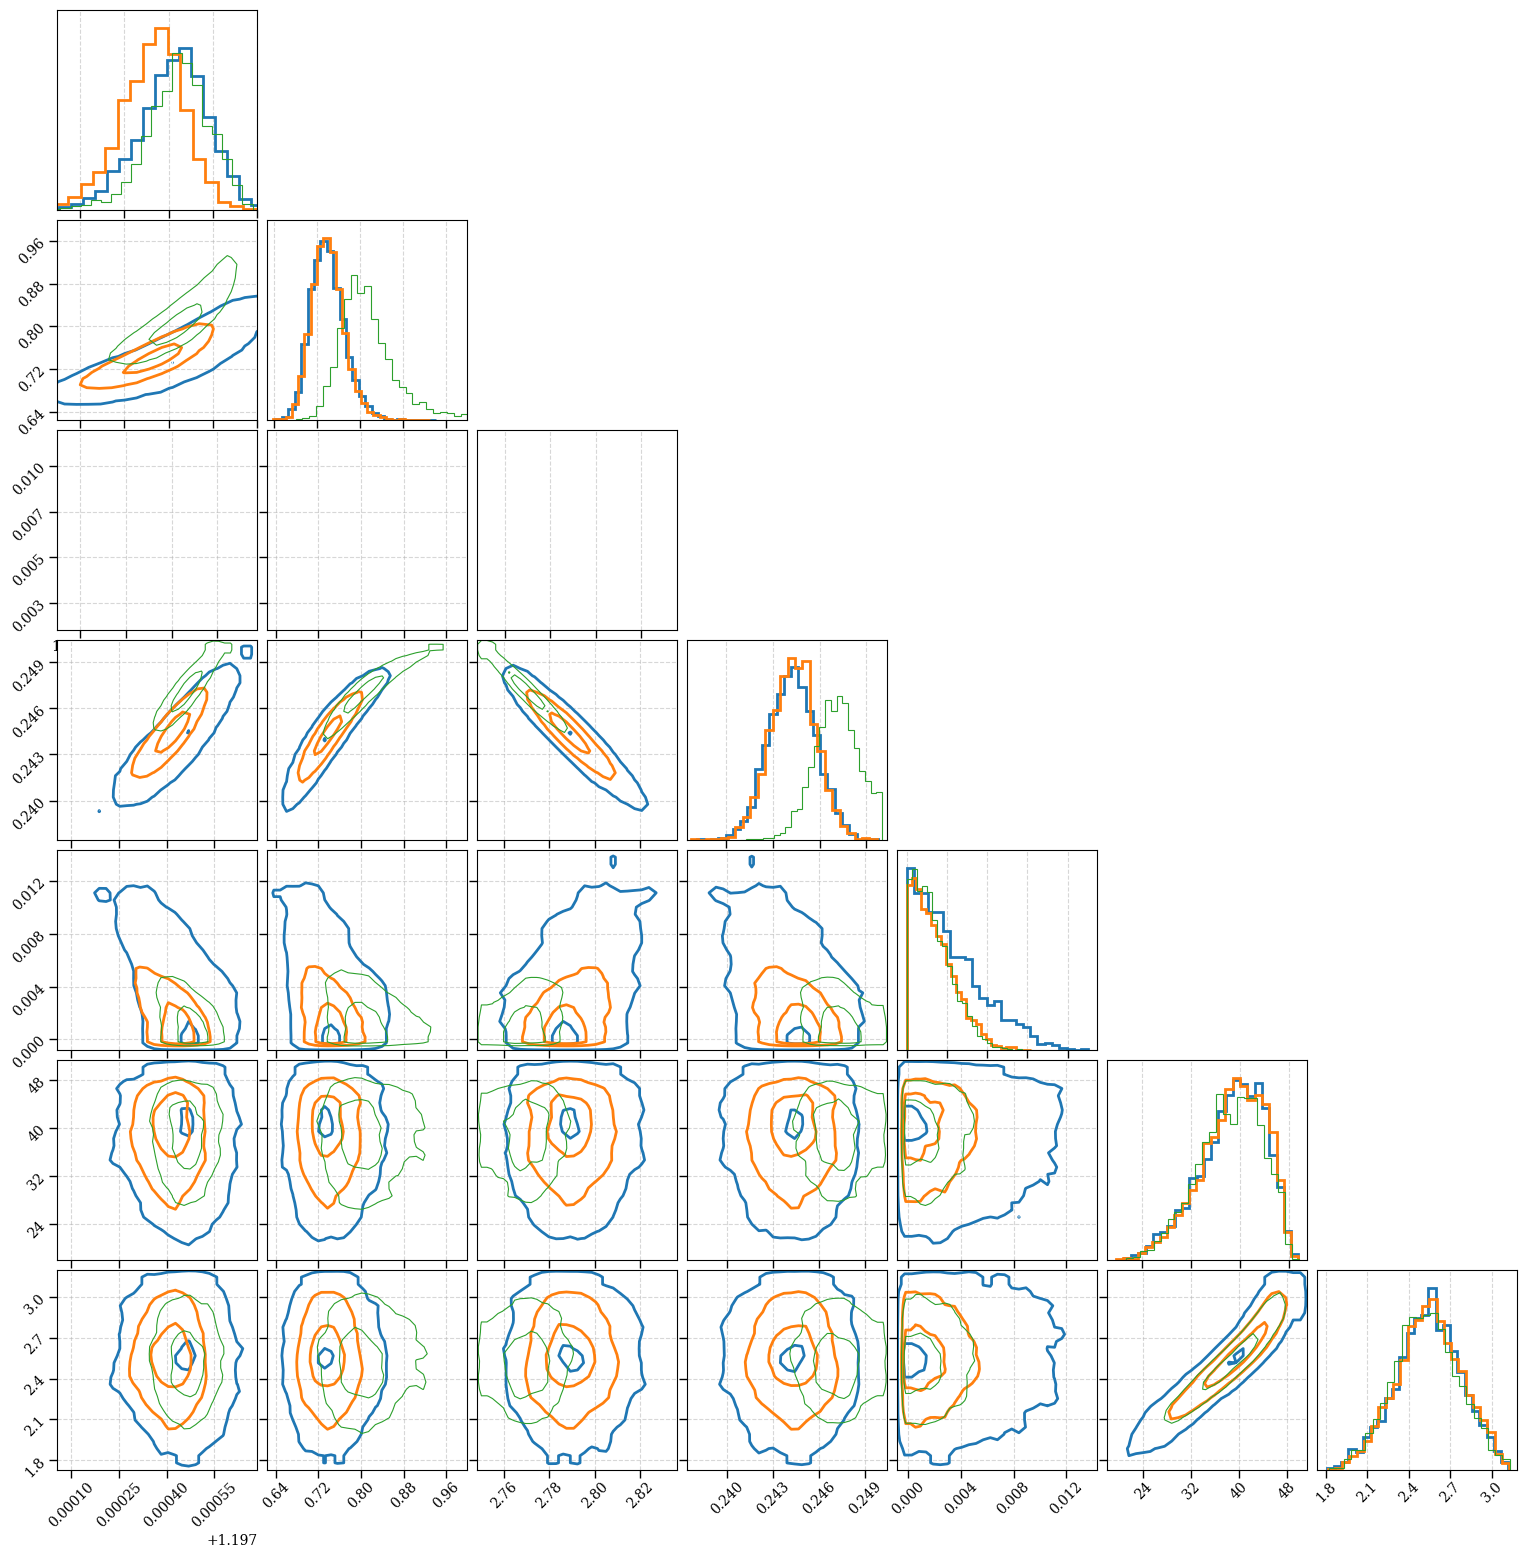

In [149]:
ndim = 7
plt.rcParams.update({
    'backend': 'Agg',
    'savefig.dpi': 300,
    'grid.alpha': 0.5,
    'path.simplify': True,
    'font.family': 'serif',
    'mathtext.fontset': 'custom',
    'xtick.major.size': 6,
    'ytick.major.size': 6,
    'xtick.minor.size': 3,
    'ytick.minor.size': 3,
    'xtick.major.width': 1,
    'ytick.major.width': 1,
    'xtick.minor.width': 1,
    'ytick.minor.width': 1,
    'lines.markeredgewidth': 1,
    'legend.numpoints': 1,
    'legend.frameon': False,
    'legend.handletextpad': 0.3
})
fig, axes = plt.subplots(ndim, ndim, figsize=(16, 16),
                        gridspec_kw={"hspace": 0.05, "wspace": 0.05})
corner.corner(df1, fig=fig,
                       color = 'C0', bins=25, smooth=0.8, plot_datapoints=False, plot_density=False, \
                       contourf_kwargs= dict(alpha=0.4), levels=(0.1,0.99), hist_kwargs={'linewidth': 2},
                        contour_kwargs={'linewidths': 2},)
corner.corner(df2, fig=fig,
                          color = 'C1', bins=25, smooth=0.8, plot_datapoints=False, plot_density=False, contourf_kwargs= dict(alpha=0.4), levels=(0.393,0.864), hist_kwargs={'linewidth': 2}, 
                            contour_kwargs={'linewidths': 2},
)
corner.corner(df3, fig=fig,
        color = 'C2', bins=25, smooth=0.8, plot_datapoints=False, plot_density=False, \
        contourf_kwargs= dict(alpha=0.4, linewidths=0.5), levels=(0.393,0.864),
        labels=None,
        hist_kwargs={'linewidth': 0.8}, 
        contour_kwargs={'linewidths': 0.8},
)

# pad = 30
# axes[6,0].set_xlabel(r'$\mathcal{M}$', labelpad=pad)
# axes[6,1].set_xlabel(r'$q$', labelpad=pad)
# axes[6,2].set_xlabel(r'$m$', labelpad=pad)
# axes[6,3].set_xlabel(r'$\eta$', labelpad=pad)
# axes[6,4].set_xlabel(r'$e_0$', labelpad=pad)
# axes[6,5].set_xlabel(r'$D_L$', labelpad=pad)
# axes[6,6].set_xlabel(r'$\theta_{jn}$', labelpad=pad)
# axes[6,0].set_ylabel(r'$\theta_{jn}$', labelpad=pad)
# axes[5,0].set_ylabel(r'$D_L$', labelpad=pad)
# axes[4,0].set_ylabel(r'$e_0$', labelpad=pad)
# axes[3,0].set_ylabel(r'$\eta$', labelpad=pad)
# axes[2,0].set_ylabel(r'$m$', labelpad=pad)
# axes[1,0].set_ylabel(r'$q$', labelpad=pad)
# for ax in axes.flatten():
#     ax.tick_params(axis='x', labelbottom=True, pad=1)  # Padding for x-axis tick labels
#     ax.tick_params(axis='y', labelleft=True, pad=1)    # Padding for y-axis tick labels
#     ax.set_xlabel(ax.get_xlabel(), labelpad=50)         # Padding for x-axis label
#     ax.set_ylabel(ax.get_ylabel(), labelpad=50)         # Padding for y-axis label

# # Apply padding AFTER corner plots are drawn
# axes[6, 0].tick_params(axis='x', rotation=45, pad=1)
# axes[6, 1].tick_params(axis='x', rotation=45, pad=1)
# axes[6, 2].tick_params(axis='x', rotation=45, pad=1)
# axes[6, 3].tick_params(axis='x', rotation=45, pad=1)
# axes[6, 4].tick_params(axis='x', rotation=45, pad=1)
# axes[6, 5].tick_params(axis='x', rotation=45, pad=1)
# axes[6, 6].tick_params(axis='x', rotation=45, pad=1)
# axes[6, 0].tick_params(axis='y', rotation=45, pad=1)
# axes[5, 0].tick_params(axis='y', rotation=45, pad=1)
# axes[4, 0].tick_params(axis='y', rotation=45, pad=1)
# axes[3, 0].tick_params(axis='y', rotation=45, pad=1)
# axes[2, 0].tick_params(axis='y', rotation=45, pad=1)
# axes[1, 0].tick_params(axis='y', rotation=45, pad=1)

# # # for axes[2, 0] x tick label, write in scientific notation
# #axes[2, 0].ticklabel_format(axis='x', style='sci', scilimits=(0,0))
# axes[6, 0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '%.5f' % x))
# # precesion of eccentricity, 3 decimal places, axes[2, 2] x-axis
# axes[6, 6].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '%.3f' % x))
# axes[5, 0].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '%.3f' % y))

# # increase padding for the tick labels, of x-axis
# # for ax in axes.flatten():
# #     ax.tick_params(axis='x', pad=0)


# # get what's in the title and change  title precision of axes[0, 0]
# # title = axes[0, 0].get_title()

# # Manually set titles with desired formatting
# #axes[0, 0].set_title(f'{df1["chirp_mass"].mean():.4f}')
# # axes[1, 1].set_title(f'{df1["mass_ratio"].mean():.3f}')
# # axes[2, 2].set_title(f'{df1["eccentricity"].mean():.2f}')

# # add grid
# for ax in axes.flatten():
#     ax.grid(True, linestyle='--', alpha=0.5)

# # for $m$
# # tight layout
# # plt.tight_layout()
# #plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.05, hspace=0.05)
# # save the figure
# plt.savefig("full_corner_plot_gw170817.pdf", dpi=300)
# plt.show()
# Adjust label padding and tick parameters
for ax in axes.flatten():
    ax.tick_params(axis='x', pad=1)  # Increase padding for x tick labels
    ax.tick_params(axis='y', pad=1)  # Increase padding for y tick labels
    ax.set_xlabel(ax.get_xlabel(), labelpad=50)  # Increase padding for x-axis label
    ax.set_ylabel(ax.get_ylabel(), labelpad=50)  # Increase padding for y-axis label

# Your existing limits and formatting
axes[2, 0].set_xlim(0.00024+1.197, 0.00059+1.197)
axes[1, 0].set_xlim(0.00024+1.197, 0.00060+1.197)
axes[0, 0].set_xlim(0.00024+1.197, 0.00060+1.197)
axes[2, 0].set_ylim(0.001, 0.012)
axes[2, 1].set_ylim(0.001, 0.012)
axes[2, 2].set_xlim(0.001, 0.012)

axes[2, 0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '%.5f' % x))
axes[2, 2].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '%.3f' % x))
axes[2, 0].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '%.3f' % y))

# Add grid
for ax in axes.flatten():
    ax.grid(True, linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout()
plt.show()

ValueError: Provided figure has 9 axes, but data has dimensions K=7

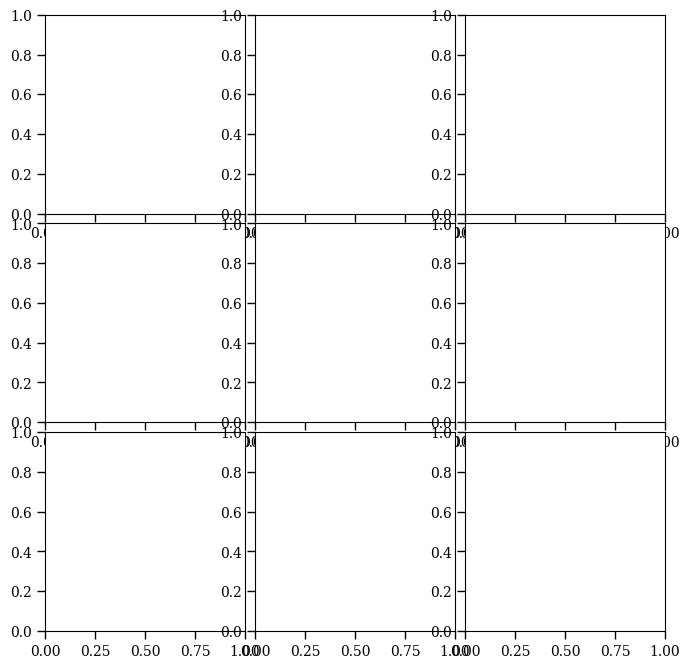

In [44]:
ndim = 3
plt.rcParams.update({
    'backend': 'Agg',
    'savefig.dpi': 300,
    'grid.alpha': 0.5,
    'path.simplify': True,
    'font.family': 'serif',
    'mathtext.fontset': 'custom',
    'xtick.major.size': 6,
    'ytick.major.size': 6,
    'xtick.minor.size': 3,
    'ytick.minor.size': 3,
    'xtick.major.width': 1,
    'ytick.major.width': 1,
    'xtick.minor.width': 1,
    'ytick.minor.width': 1,
    'lines.markeredgewidth': 1,
    'legend.numpoints': 1,
    'legend.frameon': False,
    'legend.handletextpad': 0.3
})
fig, axes = plt.subplots(ndim, ndim, figsize=(8, 8),
                        # increase padding between subplots
                        gridspec_kw={"hspace": 0.05, "wspace": 0.05})
corner.corner(df1, fig=fig,
                       color = 'C0', bins=25, smooth=0.7, plot_datapoints=False, plot_density=False, \
                       contourf_kwargs= dict(alpha=0.4), levels=(0.393,0.864), hist_kwargs={'linewidth': 0.8},
                            label_kwargs={'labelpad': 3}, 
                            contour_kwargs={'linewidths': 0.8})
                    #    quantiles=[0.05, 0.5, 0.95], show_titles=True, title_kwargs={"fontsize": 10},
                    #     # precision for show titles, 4 decimal for chirp mass, 3 decimal for mass ratio, 2 decimal for eccentricity
                    #       )

corner.corner(df2, fig=fig,
                          color = 'C1', bins=25, smooth=0.7, plot_datapoints=False, plot_density=False, contourf_kwargs= dict(alpha=0.4), levels=(0.393,0.864), hist_kwargs={'linewidth': 0.8}, 
                            contour_kwargs={'linewidths': 0.8})
corner.corner(df3, fig=fig,
                            color = 'C2', bins=25, smooth=0.7, plot_datapoints=False, plot_density=False, \
                            contourf_kwargs= dict(alpha=0.4, linewidths=0.5), levels=(0.393,0.864),
                            labels=[r"$\mathcal{M}$", r"$q$", r"$e_0$"],
                            label_kwargs={'labelpad': 20, 'fontsize': 14},
                            hist_kwargs={'linewidth': 0.8}, 
                            contour_kwargs={'linewidths': 0.8})

# Apply padding AFTER corner plots are drawn
for ax in axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), labelpad=10)
    ax.set_ylabel(ax.get_ylabel(), labelpad=10)

# put x and y limits on all subplots
# put x and y limits on all subplots
# for $M_c$
axes[0, 0].set_xlim(0.00024+1.197, 0.00059+1.197)
axes[1, 0].set_xlim(0.00024+1.197, 0.00060+1.197)
#axes[0, 0].set_xlim(0.00024+1.197, 0.00060+1.197)
# for $e_0$
axes[1, 0].set_ylim(0.001, 0.010)
axes[1, 1].set_ylim(0.001, 0.010)
axes[2, 2].set_xlim(0.001, 0.012)

# for axes[2, 0] x tick label, write in scientific notation
#axes[2, 0].ticklabel_format(axis='x', style='sci', scilimits=(0,0))
axes[2, 0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '%.5f' % x))
# precesion of eccentricity, 3 decimal places, axes[2, 2] x-axis
axes[2, 2].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '%.3f' % x))
axes[1, 0].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '%.3f' % y))
# increase padding for the tick labels, of x-axis
# for ax in axes.flatten():
#     ax.tick_params(axis='x', pad=20)


# get what's in the title and change  title precision of axes[0, 0]
# title = axes[0, 0].get_title()

# Manually set titles with desired formatting
#axes[0, 0].set_title(f'{df1["chirp_mass"].mean():.4f}')
# axes[1, 1].set_title(f'{df1["mass_ratio"].mean():.3f}')
# axes[2, 2].set_title(f'{df1["eccentricity"].mean():.2f}')

# add grid
for ax in axes.flatten():
    ax.grid(True, linestyle='--', alpha=0.5)

# for $m$
# tight layout
plt.tight_layout()
# save the figure
plt.savefig("corner_plot.pdf", dpi=300)
plt.show()

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline
import bilby
import pandas as pd
import numpy as np
import seaborn as sns
from bilby.gw.result import CBCResult
import matplotlib.lines as mlines
from kde_contour import Bounded_1d_kde, kdeplot_2d_clevels

rng = np.random.default_rng(12345)

sns.set_theme(palette='colorblind', font_scale=1.5)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})

# 8078 4423 4114 14858 28107
nsamples = 4114

result1 = bilby.result.read_in_result("ecck.hdf5").posterior
result_ecck = result1.sample(nsamples, random_state=rng)
result_ecck["templates"] = np.full(len(result_ecck), "Ecck 3PN")
result_ecck["chirp_mass"] = result_ecck["chirp_mass"]
result_ecck["eccentricity"] = result_ecck["eccentricity"]

result2 = bilby.result.read_in_result("ecc3PNnospin.hdf5").posterior
result_ecc3PN = result2.sample(nsamples, random_state=rng)
result_ecc3PN["templates"] = np.full(len(result_ecc3PN), "Ecc 3PN")
result_ecc3PN["chirp_mass"] = result_ecc3PN["chirp_mass"]
result_ecc3PN["eccentricity"] = result_ecc3PN["eccentricity"]

result4 = bilby.result.read_in_result("ecc3p5nospin.hdf5").posterior
result_ecc3p5nospin = result4.sample(nsamples, random_state=rng)
result_ecc3p5nospin["templates"] = np.full(len(result_ecc3p5nospin), "Ecc 3.5PN")
result_ecc3p5nospin["chirp_mass"] = result_ecc3p5nospin["chirp_mass"]
result_ecc3p5nospin["eccentricity"] = result_ecc3p5nospin["eccentricity"]

result = pd.concat([result_ecck, result_ecc3PN, result_ecc3p5nospin],ignore_index=True)


In [65]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

plt.rcParams.update({
    'backend': 'Agg',
    'savefig.dpi': 300,
    'grid.alpha': 0.5,
    'path.simplify': True,
    'font.family': 'serif',
    'mathtext.fontset': 'custom',
    'xtick.major.size': 6,
    'ytick.major.size': 6,
    'xtick.minor.size': 3,
    'ytick.minor.size': 3,
    'xtick.major.width': 1,
    'ytick.major.width': 1,
    'xtick.minor.width': 1,
    'ytick.minor.width': 1,
    'lines.markeredgewidth': 1,
    'legend.numpoints': 1,
    'legend.frameon': False,
    'legend.handletextpad': 0.3
})

lw = 1

def kdeplot2d(x, y, rng=12345, **kws):
    kws.pop('label', None)
    kdeplot_2d_clevels(xs=x, ys=y, auto_bound=True, linewidths=lw, rng=rng, **kws)

def kdeplot1d(x, **kws):
    if np.all(x.isna()):
        return
    for key in ['label', 'hue_order', 'color']:
        kws.pop(key, None)
    df = pd.DataFrame({'x': x, 'y': Bounded_1d_kde(x, xlow=min(x), xhigh=max(x), **kws)(x)})
    df = df.sort_values(['x'])
    plt.fill_between(df['x'], df['y'], np.zeros(len(x)), alpha=0.1)
    plt.plot(df['x'], df['y'], lw=lw)
    plt.xlim(df['x'].min(), df['x'].max())
    current_ymax = plt.ylim()[1]
    if current_ymax > df['y'].max()*1.05:
        plt.ylim(0,current_ymax)
    else:
        plt.ylim(0,df['y'].max()*1.05)

vars = ['chirp_mass', 'mass_ratio', 'eccentricity']
g = sns.PairGrid(data=result,
                 vars=vars,
                 corner=True, hue="templates",
                 diag_sharey=False,
                 layout_pad=0.,
                 height=1.5,
                )
g.map_lower(kdeplot2d, levels=[0.864,0.393])
g.map_diag(kdeplot1d)
# 28s

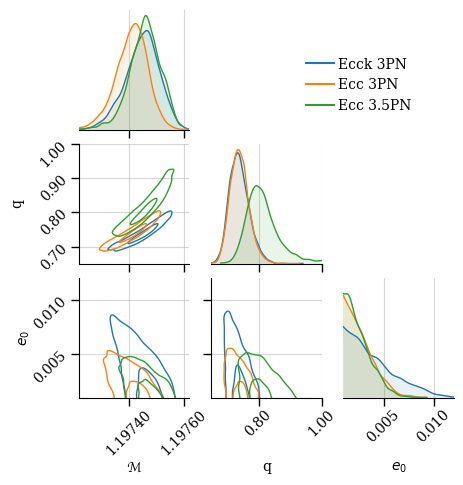

In [66]:
# for i in range(len(vars)):
#     for j in range(i+1):
#         g.axes[i,j].set_xlim(result[vars[j]].min(), result[vars[j]].max())
#         g.axes[i,j].set_ylim(result[vars[i]].min(), result[vars[i]].max())
#         g.axes[i, j].tick_params(axis='x', rotation=45, pad=2) 
#                                  # position it a little bit to the left
#                                     # labelleft=True, labelright=False)
#         g.axes[i, j].tick_params(axis='y', rotation=45, pad=2)
        # Rotate y-axis tick labels
        #g.axes[i, j].tick_params(axis='y', rotation=45)
        # limit to .1f
        # if g.axes[i, j].yaxis is not None:
        #     g.axes[i, j].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}'))
        # if g.axes[i, j].xaxis is not None:
        #     g.axes[i, j].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}'))
        # use scientific notation for chirp mass
g.axes[2, 2].tick_params(axis='x', rotation=45, pad=1)
g.axes[2, 1].tick_params(axis='x', rotation=45, pad=1)
g.axes[2, 0].tick_params(axis='x', rotation=45, pad=1)
g.axes[2, 0].tick_params(axis='y', rotation=45, pad=1)
g.axes[1, 0].tick_params(axis='y', rotation=45, pad=1)

g.axes[2, 0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '%.5f' % x))
g.axes[2, 1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '%.2f' % x))
g.axes[2, 2].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '%.3f' % x))
g.axes[2, 0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '%.3f' % x))
g.axes[1, 0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '%.2f' % x))      

# def chirp_mass_formatter(x, pos):
#     return f'{(x-1.197)*1e4:.0f}'
# # Apply the custom formatter to the chirp mass axis
# g.axes[2,0].xaxis.set_major_formatter(plt.FuncFormatter(chirp_mass_formatter))
# # Add a secondary label next to the chirp mass axis
# g.axes[2,0].text(0, -0.5, r'$\times 10^{-4} + 1.197$', transform=g.axes[2,0].transAxes)

g.axes[2,0].set_xlabel(r'$\mathcal{M}$', labelpad=2)
g.axes[1,0].set_ylabel(r'q', labelpad=10)
g.axes[2,1].set_xlabel(r'q', labelpad=15)
g.axes[2,0].set_ylabel(r'$e_0$', labelpad=0)
g.axes[2,2].set_xlabel(r'$e_0$', labelpad=11)

g.axes[2,0].set_xlim(1.19722, 1.19762)
g.axes[2,0].set_ylim(0.001, 0.012)
g.axes[2,2].set_xlim(0.001, 0.012)
g.axes[2,1].set_xlim(0.65, 1.)
g.axes[1,0].set_ylim(0.65, 1.)

# add grid
for i in range(3):
    for j in range(3):
        if g.axes[i, j] is not None:
            g.axes[i, j].grid(True, which="both", ls="-", alpha=0.5)

# add legend with line colors
blue_line = mlines.Line2D([], [], color='C0', label='Ecck 3PN')
orange_line = mlines.Line2D([], [], color='C1', label='Ecc 3PN')
green_line = mlines.Line2D([], [], color='C2', label='Ecc 3.5PN')
handles = [blue_line, orange_line, green_line]
labels = [h.get_label() for h in handles] 
g.fig.legend(handles=handles, labels=labels, bbox_to_anchor=(0., 0.9, 0.9, .0), ncol=1) # Adjust loc and ncol as needed

g.savefig("GW170817a.pdf", bbox_inches="tight", dpi=300)
plt.show()

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import h5py
import bilby
import pandas as pd
import numpy as np
import seaborn as sns
from bilby.gw.result import CBCResult
import matplotlib.lines as mlines
from kde_contour import Bounded_1d_kde, kdeplot_2d_clevels

rng = np.random.default_rng(12345)

sns.set_theme(palette='colorblind', font_scale=1.5)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})

# 8078 4423 4114 14858 28107
nsamples = 4114

result1 = bilby.result.read_in_result("ecck.hdf5").posterior
df1 = result1.sample(nsamples, random_state=rng)
df1["templates"] = np.full(len(df1), "Ecck 3PN")
df1["chirp_mass"] = df1["chirp_mass"]
df1["eccentricity"] = df1["eccentricity"]

result3 = bilby.result.read_in_result("ecc3p5PNspin.hdf5").posterior
result_ecc3p5spin = result3.sample(nsamples, random_state=rng)
result_ecc3p5spin["templates"] = np.full(len(result_ecc3p5spin), "Ecc3.5PN spin")
result_ecc3p5spin["chirp_mass"] = result_ecc3p5spin["chirp_mass"]
result_ecc3p5spin["eccentricity"] = result_ecc3p5spin["eccentricity"]

f = h5py.File('GW170817_GWTC-1.hdf5', 'r')
events = f['IMRPhenomPv2NRT_lowSpin_posterior']
m10 = np.array(events['m1_detector_frame_Msun'])
m20 = np.array(events['m2_detector_frame_Msun'])
chirp_mass0 = ( (m10*m20)**(3/5) )/( (m10+m20)**(1/5) )
mass_ratio0 = m20/m10
result_pv2nrt = pd.DataFrame({'chirp_mass': chirp_mass0, 'mass_ratio': mass_ratio0, 'templates': 'Pv2NRT'})
result_pv2nrt = result_pv2nrt.sample(nsamples, random_state=rng)
result_pv2nrt["chirp_mass"] = result_pv2nrt["chirp_mass"]
result_pv2nrt["eccentricity"] = np.full(len(result_pv2nrt), None)

result5 = h5py.File("tf2_e_170817v2.hdf", "r")
m1_src = np.array(result5['samples']['srcmass1'])
m2_src = np.array(result5['samples']['srcmass2'])
idx = m1_src < m2_src
m1_src[idx], m2_src[idx] = m2_src[idx], m1_src[idx]
dl = np.array(result5['samples']['distance'])
# import astropy, convert dl to z, and convert mass to detector frame
from astropy.cosmology import Planck18
from astropy import units as u
# make a spline 
from scipy.interpolate import interp1d
z = np.linspace(0, 2, 1000)
dl_ = Planck18.luminosity_distance(z)
f = interp1d(dl_, z)
z = f(dl)
m15 = m1_src*(1+z)
m25 = m2_src*(1+z)
chirp_mass5 = ( (m15*m25)**(3/5) )/( (m15+m25)**(1/5) )
mass_ratio5 = m25/m15
e05 = np.array(result5['samples']['eccentricity'])
result_lnb = pd.DataFrame({'chirp_mass': chirp_mass5, 'mass_ratio': mass_ratio5, 'eccentricity': e05, 'templates': 'LNB'})
result_lnb = result_lnb.sample(2400, random_state=rng)
result_lnb["chirp_mass"] = result_lnb["chirp_mass"]
result_lnb["eccentricity"] = result_lnb["eccentricity"]

result = pd.concat([df1, result_ecc3p5spin, result_lnb, result_pv2nrt], ignore_index=True)

/var/folders/ws/0948zvwd7g795j2l3fryghjw0000gp/T/ipykernel_43284/2927835395.py:73: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([df1, result_ecc3p5spin, result_lnb, result_pv2nrt], ignore_index=True)


In [61]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

plt.rcParams.update({
    'backend': 'Agg',
    'savefig.dpi': 300,
    'grid.alpha': 0.5,
    'path.simplify': True,
    'font.family': 'serif',
    'mathtext.fontset': 'custom',
    'xtick.major.size': 6,
    'ytick.major.size': 6,
    'xtick.minor.size': 3,
    'ytick.minor.size': 3,
    'xtick.major.width': 1,
    'ytick.major.width': 1,
    'xtick.minor.width': 1,
    'ytick.minor.width': 1,
    'lines.markeredgewidth': 1,
    'legend.numpoints': 1,
    'legend.frameon': False,
    'legend.handletextpad': 0.3
})

lw = 1

def kdeplot2d(x, y, rng=12345, **kws):
    kws.pop('label', None)
    kdeplot_2d_clevels(xs=x, ys=y, auto_bound=True, linewidths=lw, rng=rng, **kws)

# def kdeplot1d(x, **kws):
#     if np.all(x.isna()):
#         return
#     for key in ['label', 'hue_order', 'color']:
#         kws.pop(key, None)
#     df = pd.DataFrame({'x': x, 'y': Bounded_1d_kde(x, xlow=min(x), xhigh=max(x), **kws)(x)})
#     df = df.sort_values(['x'])
#     plt.fill_between(df['x'], df['y'], np.zeros(len(x)), alpha=0.2)
#     plt.plot(df['x'], df['y'], lw=lw)
#     plt.xlim(df['x'].min(), df['x'].max())
#     current_ymax = plt.ylim()[1]
#     if current_ymax > df['y'].max()*1.05:
#         plt.ylim(0,current_ymax)
#     else:
#         plt.ylim(0,df['y'].max()*1.05)

vars = ['chirp_mass', 'mass_ratio', 'eccentricity']
g = sns.PairGrid(data=result,
                 vars=vars,
                 corner=True, 
                 hue="templates",
                 palette=['C0', 'C3', 'C4', 'C5'],
                 diag_sharey=False,
                 layout_pad=0.,
                 height=1.5,
                )
g.map_lower(kdeplot2d, levels=[0.864,0.393])
# g.map_diag(kdeplot1d) 0.864,0.393
# nsamples = 2400, time = 20.9s

In [62]:
def kdeplot1d(x, **kws):
    #  define colors for plt
    if kws['label']=='Ecck 3PN':
        color = 'C0'
    elif kws['label']=='Ecc3.5PN spin':
        color = 'C3'
    elif kws['label']=='Pv2NRT':
        color = 'C5'
    elif kws['label']=='LNB':
        color = 'C4'
    else:
        raise ValueError('Invalid template')

    if np.all(x.isna()):
        return
    for key in ['label', 'hue_order', 'color', 'ax']:
        kws.pop(key, None)
    df = pd.DataFrame({'x': x, 'y': Bounded_1d_kde(x, xlow=min(x), xhigh=max(x), **kws)(x)})
    df = df.sort_values(['x'])
    plt.fill_between(df['x'], df['y'], np.zeros(len(x)), alpha=0.1, color=color)
    plt.plot(df['x'], df['y'], lw=lw, color=color)
    plt.xlim(df['x'].min(), df['x'].max())
    current_ymax = plt.ylim()[1]
    if current_ymax > df['y'].max()*1.05:
        plt.ylim(0,current_ymax)
    else:
        current_ymax = df['y'].max()*1.05
        plt.ylim(0,df['y'].max()*1.05)
    print(current_ymax)

g.map_diag(kdeplot1d)
# g.map_diag(kdeplot1d, color='C1', ax=g.axes[1,1])
# g.map_diag(kdeplot1d, color='C2', ax=g.axes[2,2])

# colors = ['C0', 'C3', 'C4']
# # Plot the diagonal plots separately with different colors
# for i, var in enumerate(vars):
#     for j, template in enumerate(result['templates'].unique()):  # Iterate over templates
#         # Filter data for the current template
#         data_filtered = result[result['templates'] == template][var]
#         # Plot on the diagonal axes
#         try:
#             kdeplot1d(data_filtered, color=colors[j], ax=g.axes[i, i], label=template)
#         except:
#             pass

7061.0975386602
7061.0975386602
7061.0975386602
7061.0975386602
13.782033426836543
13.782033426836543
13.782033426836543
13.782033426836543
224.45534806041732
285.48447498138336
285.48447498138336


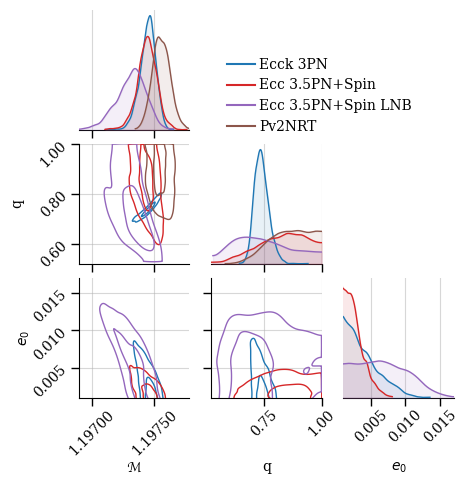

In [63]:
g.axes[2, 2].tick_params(axis='x', rotation=45, pad=1)
g.axes[2, 1].tick_params(axis='x', rotation=45, pad=1)
g.axes[2, 0].tick_params(axis='x', rotation=45, pad=1)
g.axes[2, 0].tick_params(axis='y', rotation=45, pad=1)
g.axes[1, 0].tick_params(axis='y', rotation=45, pad=1)

g.axes[2, 0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '%.5f' % x))
g.axes[2, 1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '%.2f' % x))
g.axes[2, 2].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '%.3f' % x))
g.axes[2, 0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '%.3f' % x))
g.axes[1, 0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '%.2f' % x))  

g.axes[2,0].set_xlabel(r'$\mathcal{M}$', labelpad=2)
g.axes[1,0].set_ylabel(r'q', labelpad=10)
g.axes[2,1].set_xlabel(r'q', labelpad=15)
g.axes[2,0].set_ylabel(r'$e_0$', labelpad=0)
g.axes[2,2].set_xlabel(r'$e_0$', labelpad=11)

g.axes[2,0].set_xlim(1.19690, 1.19778)
g.axes[2,0].set_ylim(0.001, 0.017)
g.axes[2,2].set_xlim(0.001, 0.017)
#
g.axes[2,1].set_xlim(0.52, 1)
g.axes[1,0].set_ylim(0.52, 1)

# add grid
for i in range(3):
    for j in range(3):
        if g.axes[i, j] is not None:
            g.axes[i, j].grid(True, which="both", ls="-", alpha=0.5)

# add legend with line colors
blue_line = mlines.Line2D([], [], color='C0', label='Ecck 3PN')
orange_line = mlines.Line2D([], [], color='C3', label='Ecc 3.5PN+Spin')
green_line = mlines.Line2D([], [], color='C5', label='Pv2NRT')
red_line = mlines.Line2D([], [], color='C4', label='Ecc 3.5PN+Spin LNB')
handles = [blue_line, orange_line, red_line, green_line]
labels = [h.get_label() for h in handles] 
g.fig.legend(handles=handles, labels=labels, bbox_to_anchor=(0., 0.9, 0.9, .0), ncol=1) # Adjust loc and ncol as needed

g.savefig("GW170817b.pdf", bbox_inches="tight", dpi=300)
plt.show()

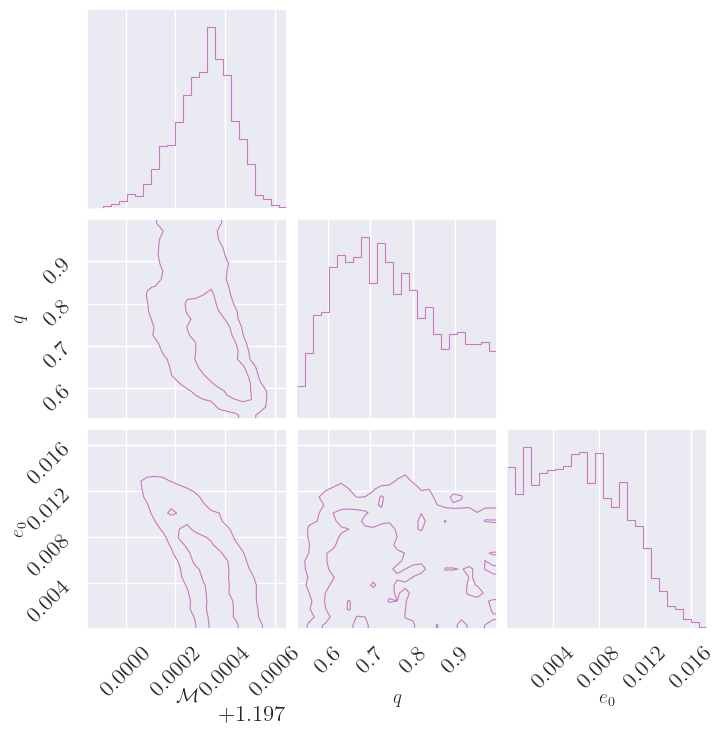

In [17]:
result5 = h5py.File("tf2_e_170817v2.hdf", "r")
m1_src = np.array(result5['samples']['srcmass1'])
m2_src = np.array(result5['samples']['srcmass2'])
idx = m1_src < m2_src
m1_src[idx], m2_src[idx] = m2_src[idx], m1_src[idx]
dl = np.array(result5['samples']['distance'])
# import astropy, convert dl to z, and convert mass to detector frame
from astropy.cosmology import Planck18
from astropy import units as u
# make a spline 
from scipy.interpolate import interp1d
z = np.linspace(0, 2, 1000)
dl_ = Planck18.luminosity_distance(z)
f = interp1d(dl_, z)
z = f(dl)
m15 = m1_src*(1+z)
m25 = m2_src*(1+z)
chirp_mass5 = ( (m15*m25)**(3/5) )/( (m15+m25)**(1/5) )
mass_ratio5 = m25/m15
e05 = np.array(result5['samples']['eccentricity'])
data = np.vstack([chirp_mass5, mass_ratio5, e05]).T

# plot cornr plot
import matplotlib.pyplot as plt
import corner

corner.corner(data, color='C4', bins=25, smooth=0.7, plot_datapoints=False, plot_density=False, \
                contourf_kwargs= dict(alpha=0.4), levels=(0.393,0.864), hist_kwargs={'linewidth': 0.8},
                labels=[r"$\mathcal{M}$", r"$q$", r"$e_0$"],
                label_kwargs={'labelpad': 20, 'fontsize': 14},
                contour_kwargs={'linewidths': 0.8})
plt.show()


In [19]:
# median, 90% credible interval of e05
median = np.median(e05)
lower = np.percentile(e05, 5)
upper = np.percentile(e05, 95)
print(f"median: {median}, lower: {lower}, upper: {upper}")
print(f"e0 = {median:.3f}^{{+{upper-median:.3f}}}_{{-{median-lower:.3f}}}")


median: 0.006110153984979272, lower: 0.0006401996723627457, upper: 0.0127186971145323
e0 = 0.006^{+0.007}_{-0.005}


In [20]:
# median of m1 and m2
median_m1 = np.median(m15)
median_m2 = np.median(m25)
print(f"median m1: {median_m1}, median m2: {median_m2}")

median m1: 1.6101118070877822, median m2: 1.1804724190016729


In [22]:
from scipy.optimize import fsolve
f0 = 10
f = 20
chi = f/f0
def func(e0):
    return e0*chi**(-19/18) - 0.006110153984979272
et0 = fsolve(func, 0.01)
print(et0)

[0.01270007]


In [ ]:
e0 = 0.006^{+0.007}_{-0.005}